## Prouni 2005 2019
### Análise Dataset Prouni


### Link
https://www.kaggle.com/lfarhat/brasil-students-scholarship-prouni-20052019

# Importando Módulos

In [1]:
#!pip install kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import os
import kaggle

# Download Dados

In [2]:
def downloadKaggle(fName, pathFile,kaggleFile):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(fName, path=pathFile, unzip=True)
    dirname = os.path.abspath('')
    arquivo=dirname + '/../datasets/'+kaggleFile
    return arquivo

arquivo = downloadKaggle('lfarhat/brasil-students-scholarship-prouni-20052019','../datasets','prouni_2005_2019.csv')

# Análise Exploratória

In [3]:
ds=pd.read_csv(arquivo,sep=',')

ds.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,F,Branca,1987-02-17,nao,SUL,RS,santo angelo,34.0
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***976940**,F,Parda,1986-06-14,nao,SUL,RS,frederico westphalen,35.0
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***045340**,F,Parda,1984-06-03,nao,SUL,RS,frederico westphalen,37.0
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***988420**,M,Branca,1987-10-19,nao,SUL,RS,frederico westphalen,33.0
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***378080**,M,Amarela,1987-07-20,nao,SUL,RS,frederico westphalen,34.0


In [4]:
# Verificando valores nulos
ds.isnull().sum().sort_values(ascending=False)

NOME_CURSO_BOLSA                  5654
NOME_IES_BOLSA                     489
REGIAO_BENEFICIARIO_BOLSA          402
SIGLA_UF_BENEFICIARIO_BOLSA        402
MUNICIPIO_BENEFICIARIO_BOLSA       402
ANO_CONCESSAO_BOLSA                  0
CODIGO_EMEC_IES_BOLSA                0
TIPO_BOLSA                           0
MODALIDADE_ENSINO_BOLSA              0
NOME_TURNO_CURSO_BOLSA               0
CPF_BENEFICIARIO_BOLSA               0
SEXO_BENEFICIARIO_BOLSA              0
RACA_BENEFICIARIO_BOLSA              0
DT_NASCIMENTO_BENEFICIARIO           0
BENEFICIARIO_DEFICIENTE_FISICO       0
idade                                0
dtype: int64

In [5]:
# Variáveis numéricas.
ds.describe()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,idade
count,2.692540e+06,2.692540e+06,2.692540e+06
mean,2.013202e+03,1.557752e+03,3.137911e+01
std,4.060982e+00,2.423453e+03,7.974098e+00
min,2.005000e+03,1.000000e+01,2.000000e+00
25%,2.010000e+03,3.220000e+02,2.500000e+01
50%,2.014000e+03,8.020000e+02,3.000000e+01
75%,2.017000e+03,1.742000e+03,3.500000e+01
max,2.019000e+03,2.251400e+04,1.500000e+02


In [6]:
# Variáveis categóricas.
ds.describe(include=['O'])

,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
count,2692051,2692540,2692540,2686886,2692540,2692540,2692540,2692540,2692540,2692540,2692138,2692138,2692138
unique,2767,3,2,3644,5,1316468,2,6,31729,2,5,27,5318
top,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***546888**,F,Branca,1993-05-07,nao,SUDESTE,SP,sao paulo
freq,155486,1876706,2192014,274695,1550628,21,1458767,1162938,535,2673367,1289321,761375,219247


In [7]:
# Número de NOME_CURSO_BOLSA por SEXO_BENEFICIARIO_BOLSA.
# 
pd.crosstab(ds['NOME_CURSO_BOLSA'],ds['SEXO_BENEFICIARIO_BOLSA'])


SEXO_BENEFICIARIO_BOLSA,F,M
NOME_CURSO_BOLSA,,
TraduAAo E InterpretaAAo,2,0
Engenharia AeronAutica E EspaAo,7,13
Engenharia BiomAdica,10,3
Engenharia Civil E Ambiental,4,3
Engenharia Da ProduAAo E Qualidade,2,2
...,...,...
Web Design,18,77
Web Design E Comercio Eletronico,0,1
Web Design E Internet,0,7


In [8]:
pd.crosstab(ds['NOME_TURNO_CURSO_BOLSA'],ds['RACA_BENEFICIARIO_BOLSA'])

RACA_BENEFICIARIO_BOLSA,Amarela,Branca,Indigena,Nao Informada,Parda,Preta
NOME_TURNO_CURSO_BOLSA,,,,,,
A Distancia,8239,191406,662,1230,226696,72293
Integral,1120,41362,104,1022,28704,6341
Matutino,9238,201865,492,4659,209667,63913
Noturno,27145,704035,1462,15748,612540,189698
Vespertino,1512,24270,158,980,36393,9586


In [9]:
pd.crosstab(ds['SIGLA_UF_BENEFICIARIO_BOLSA'],ds['RACA_BENEFICIARIO_BOLSA'])

RACA_BENEFICIARIO_BOLSA,Amarela,Branca,Indigena,Nao Informada,Parda,Preta
SIGLA_UF_BENEFICIARIO_BOLSA,,,,,,
AC,232,1428,24,32,8308,1268
AL,376,2685,37,61,10259,1999
AM,805,5877,381,251,34123,3500
AP,140,1188,15,107,6729,1382
BA,2770,17492,202,1345,86717,49692
CE,1613,12741,76,229,44308,6466
DF,2255,18371,68,515,39073,12301
ES,707,15525,77,445,24749,7180
GO,3696,25878,52,500,48753,11900


In [10]:
# Info dados.
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692540 entries, 0 to 2692539
Data columns (total 16 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ANO_CONCESSAO_BOLSA             int64  
 1   CODIGO_EMEC_IES_BOLSA           int64  
 2   NOME_IES_BOLSA                  object 
 3   TIPO_BOLSA                      object 
 4   MODALIDADE_ENSINO_BOLSA         object 
 5   NOME_CURSO_BOLSA                object 
 6   NOME_TURNO_CURSO_BOLSA          object 
 7   CPF_BENEFICIARIO_BOLSA          object 
 8   SEXO_BENEFICIARIO_BOLSA         object 
 9   RACA_BENEFICIARIO_BOLSA         object 
 10  DT_NASCIMENTO_BENEFICIARIO      object 
 11  BENEFICIARIO_DEFICIENTE_FISICO  object 
 12  REGIAO_BENEFICIARIO_BOLSA       object 
 13  SIGLA_UF_BENEFICIARIO_BOLSA     object 
 14  MUNICIPIO_BENEFICIARIO_BOLSA    object 
 15  idade                           float64
dtypes: float64(1), int64(2), object(13)
memory usage: 328.7+ MB


In [11]:
ds_tempo = ds.drop(columns=['TIPO_BOLSA','NOME_CURSO_BOLSA','NOME_TURNO_CURSO_BOLSA','CODIGO_EMEC_IES_BOLSA','NOME_IES_BOLSA','CPF_BENEFICIARIO_BOLSA','DT_NASCIMENTO_BENEFICIARIO','BENEFICIARIO_DEFICIENTE_FISICO','SIGLA_UF_BENEFICIARIO_BOLSA','MUNICIPIO_BENEFICIARIO_BOLSA'],axis=1)
ds = ds.drop(columns=['TIPO_BOLSA','NOME_CURSO_BOLSA','ANO_CONCESSAO_BOLSA','CODIGO_EMEC_IES_BOLSA','NOME_IES_BOLSA','CPF_BENEFICIARIO_BOLSA','DT_NASCIMENTO_BENEFICIARIO','BENEFICIARIO_DEFICIENTE_FISICO','MUNICIPIO_BENEFICIARIO_BOLSA'],axis=1)
ds

,MODALIDADE_ENSINO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,idade
0,PRESENCIAL,Integral,F,Branca,SUL,RS,34.0
1,PRESENCIAL,Noturno,F,Parda,SUL,RS,35.0
2,PRESENCIAL,Noturno,F,Parda,SUL,RS,37.0
3,PRESENCIAL,Noturno,M,Branca,SUL,RS,33.0
4,PRESENCIAL,Noturno,M,Amarela,SUL,RS,34.0
...,...,...,...,...,...,...,...
2692535,PRESENCIAL,Noturno,F,Parda,NORDESTE,PE,20.0
2692536,PRESENCIAL,Matutino,F,Parda,NORDESTE,PB,20.0
2692537,PRESENCIAL,Matutino,M,Branca,NORDESTE,PB,28.0
2692538,PRESENCIAL,Noturno,F,Parda,NORDESTE,PB,24.0


# Visualização dos Dados

<AxesSubplot:xlabel='SIGLA_UF_BENEFICIARIO_BOLSA', ylabel='count'>

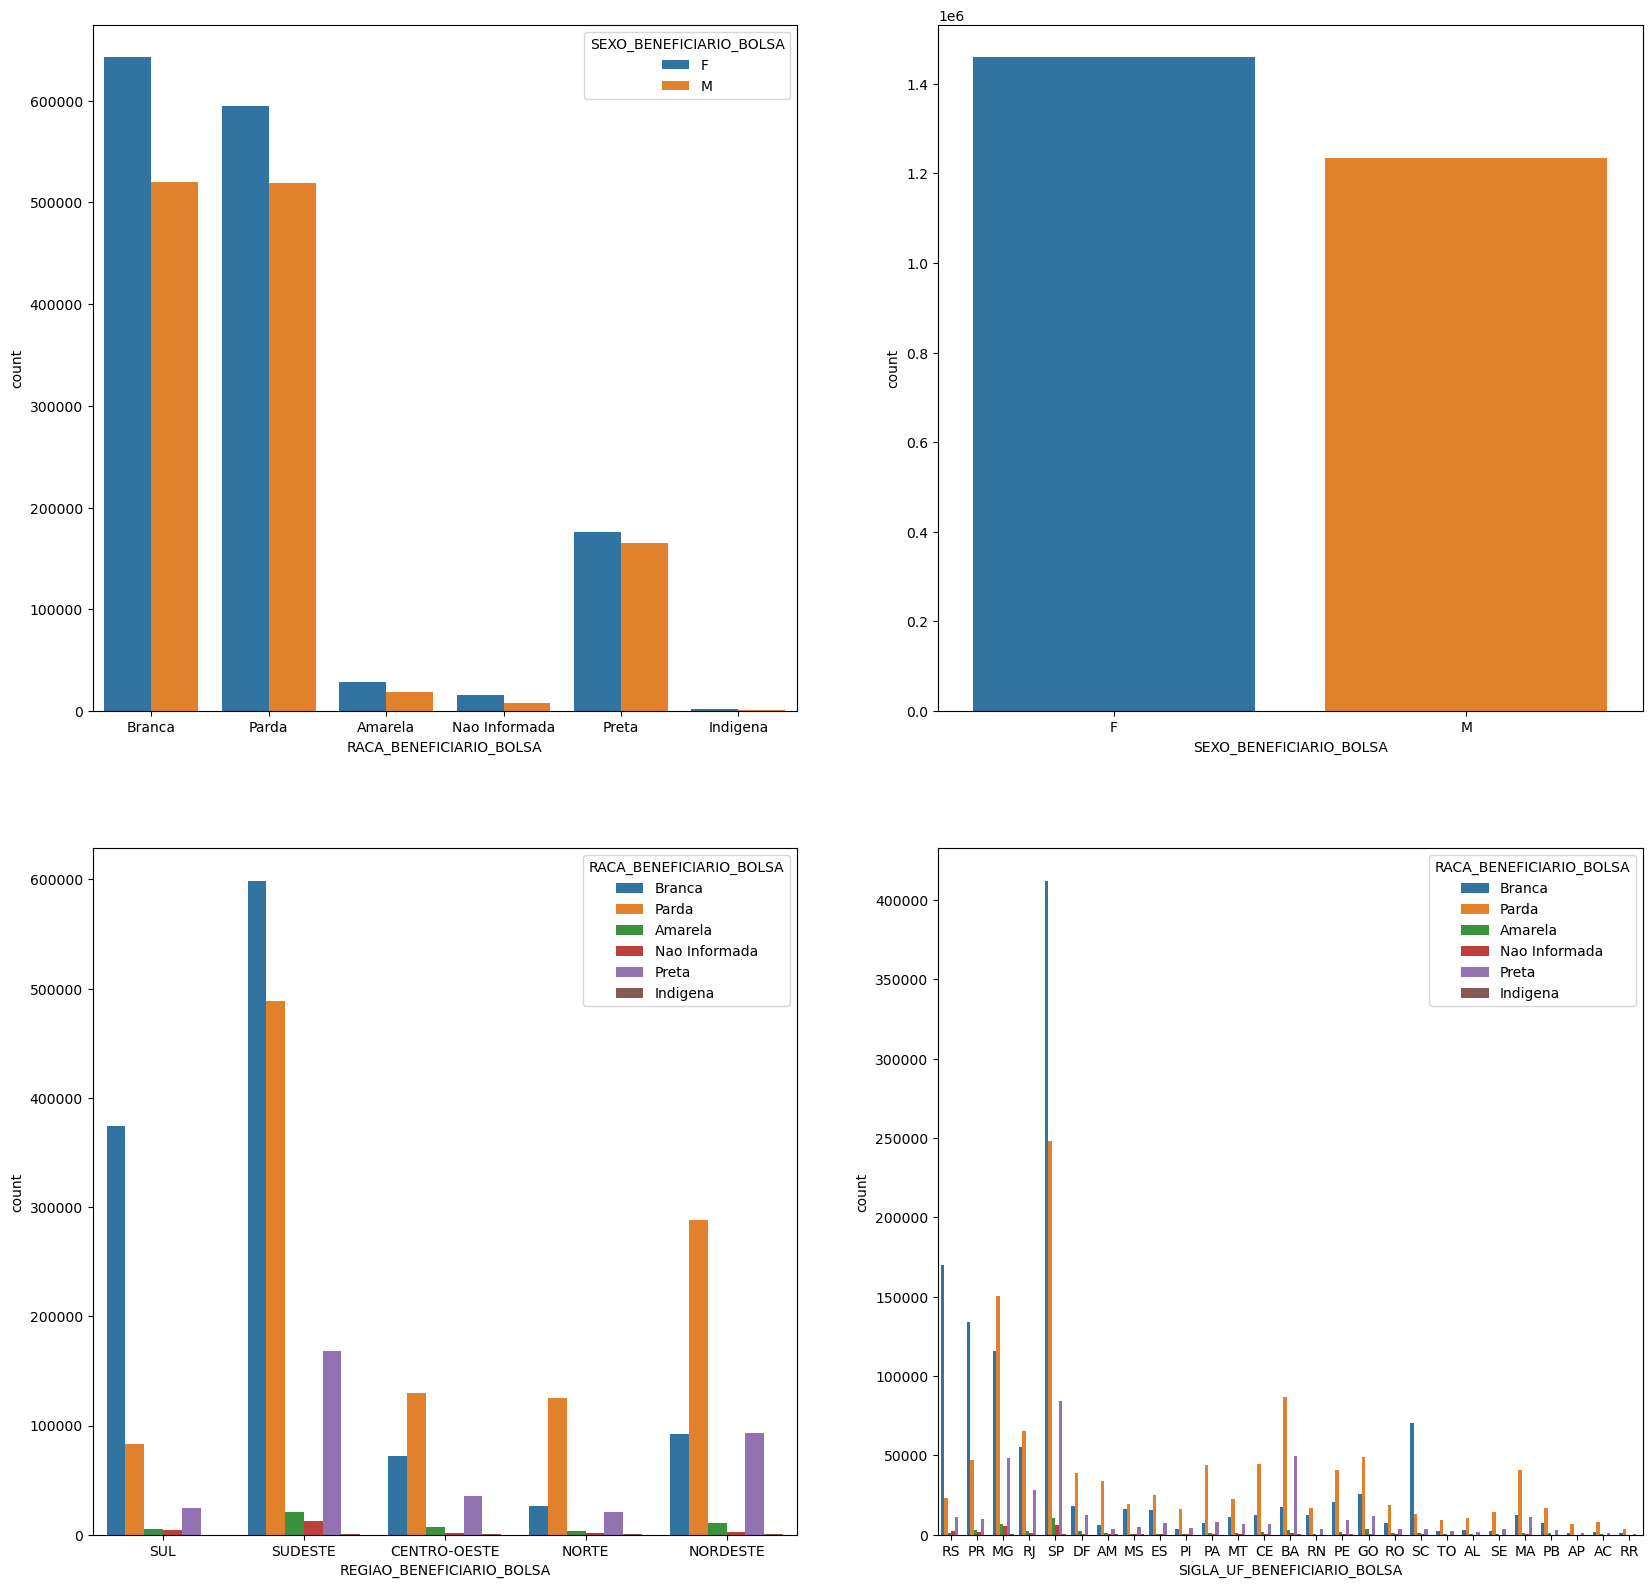

In [12]:
#raca = ds[['RACA_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA', 'MODALIDADE_ENSINO_BOLSA']].groupby(['RACA_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA']).count()
#print(raca[:-1])

#xvals = np.arange(len(ds['RACA_BENEFICIARIO_BOLSA'].value_counts()))
#yvals = list(ds['RACA_BENEFICIARIO_BOLSA'].value_counts())

#print(ds['RACA_BENEFICIARIO_BOLSA'].value_counts().argmax())
#print(xvals)
#print(yvals)
#raca

# count plot on single categorical variable
#sns.countplot(x ='RACA_BENEFICIARIO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA', data = ds)
fig, ax =plt.subplots(2,2, figsize=(20,20), dpi=100)
sns.countplot(x ='RACA_BENEFICIARIO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA', data = ds, ax=ax[0, 0])
sns.countplot(x ='SEXO_BENEFICIARIO_BOLSA', data = ds, ax=ax[0, 1])
sns.countplot(x ='REGIAO_BENEFICIARIO_BOLSA', hue='RACA_BENEFICIARIO_BOLSA', data = ds, ax=ax[1, 0])
sns.countplot(x ='SIGLA_UF_BENEFICIARIO_BOLSA', hue='RACA_BENEFICIARIO_BOLSA', data = ds, ax=ax[1, 1])

#fig.show()
 
# Show the plot
#plt.show()

In [13]:
df_temporal = ds_tempo['ANO_CONCESSAO_BOLSA'].value_counts()
#print(type(df_temporal))
#df_temporal[:,:]

In [14]:
ds_tempo.groupby(['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']).size().reset_index(name='counts')
#ds_tempo.groupby(['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']).count()

,ANO_CONCESSAO_BOLSA,RACA_BENEFICIARIO_BOLSA,counts
0,2005,Amarela,2289
1,2005,Branca,34535
2,2005,Indigena,591
3,2005,Nao Informada,22642
4,2005,Parda,25730
...,...,...,...
85,2019,Branca,86375
86,2019,Indigena,197
87,2019,Nao Informada,5
88,2019,Parda,105705


/home/lucas/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ANO_CONCESSAO_BOLSA', ylabel='counts'>

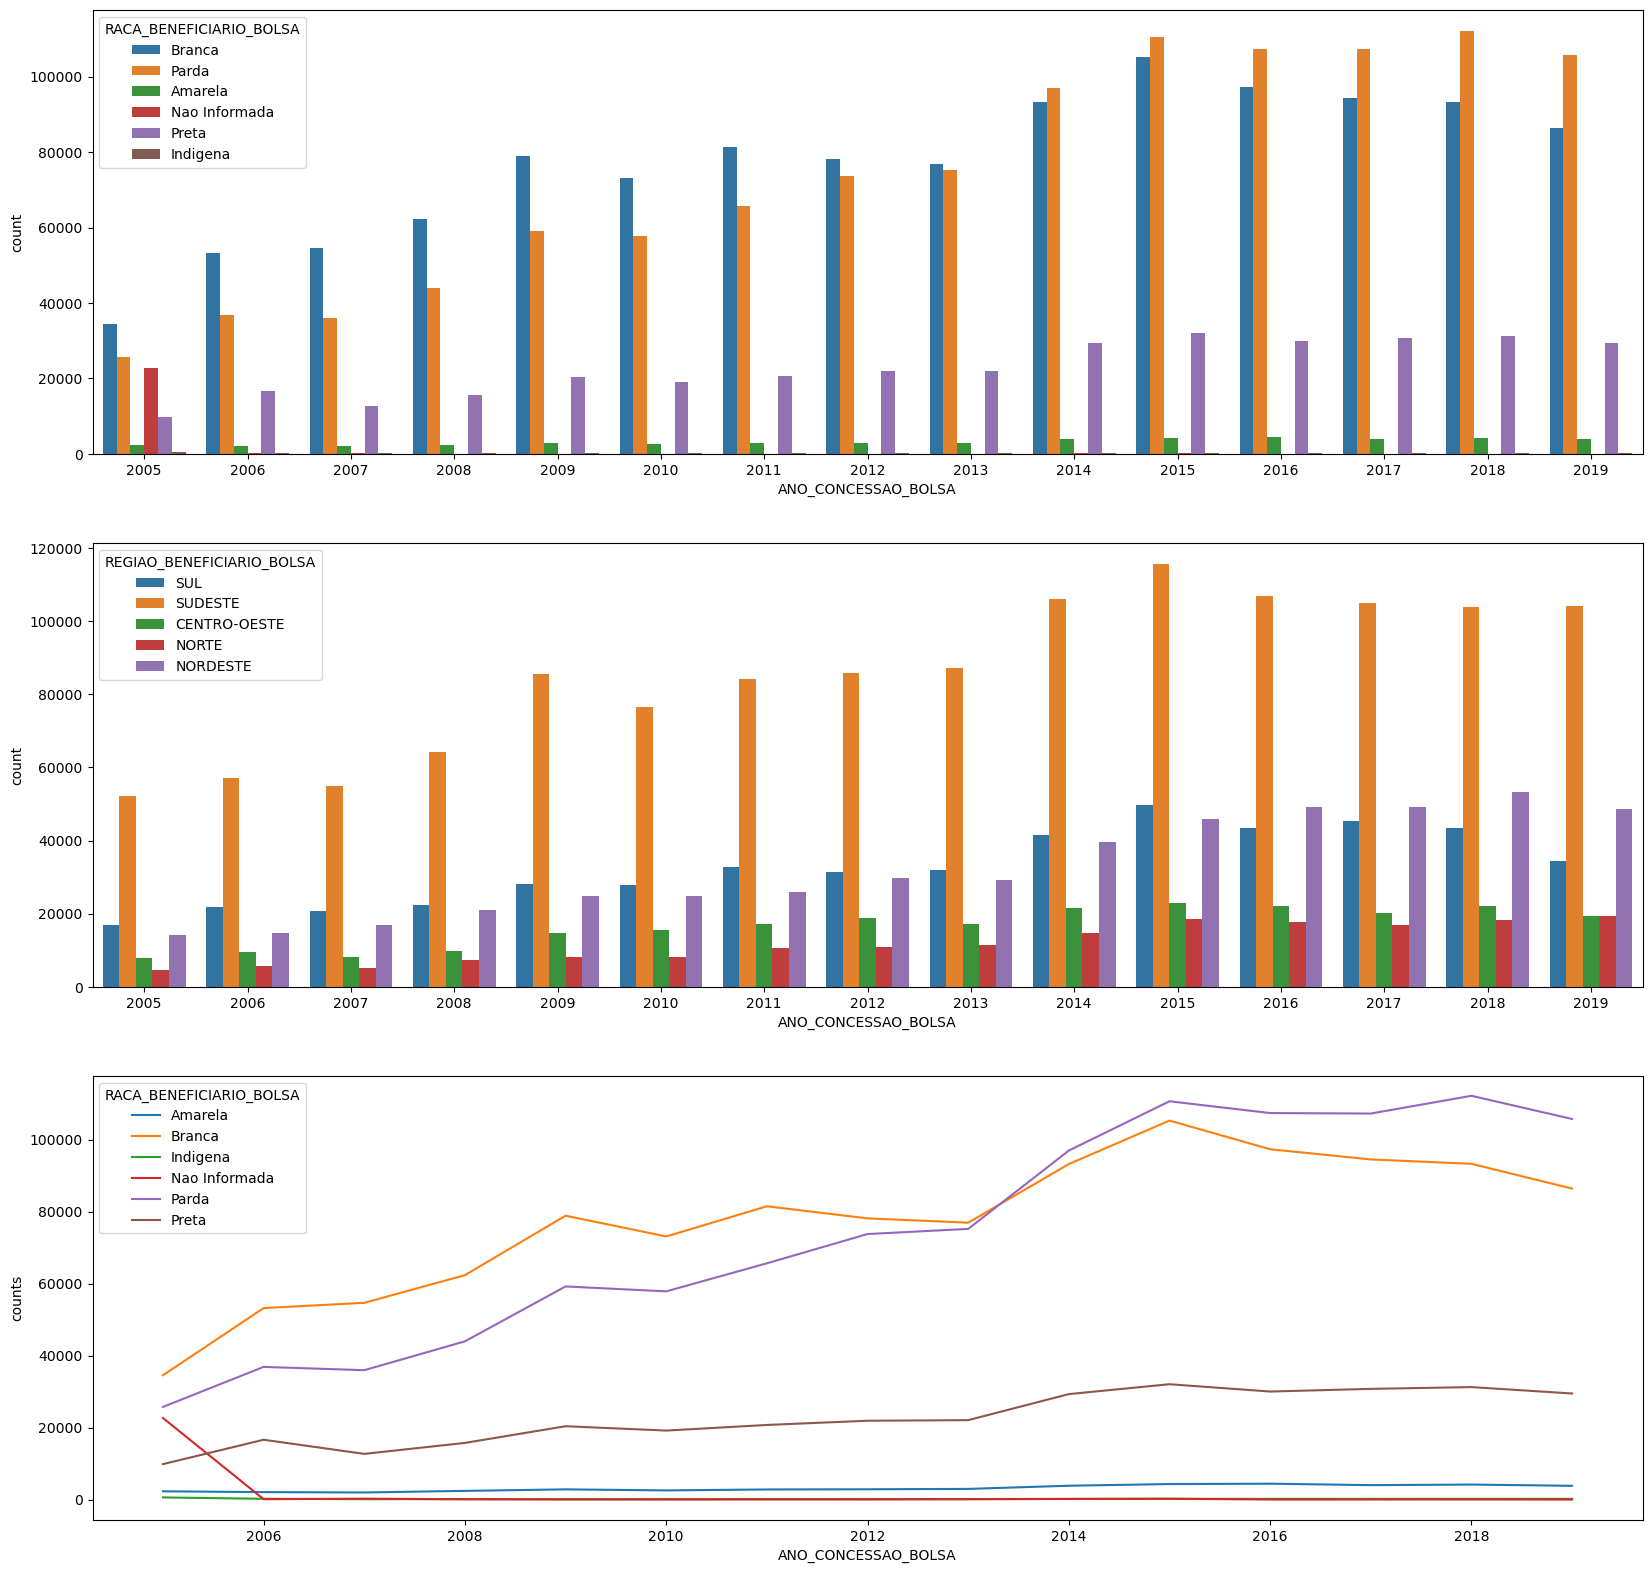

In [15]:

ds_tempo

lineRacads = ds_tempo.groupby(['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']).size().reset_index(name='counts')


ds_tempo.groupby(['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']).size().reset_index(name='counts')

fig, ax =plt.subplots(3,1,figsize=(20,20), dpi=100)
sns.countplot(x ='ANO_CONCESSAO_BOLSA', hue='RACA_BENEFICIARIO_BOLSA', data = ds_tempo,ax=ax[0])
sns.countplot(x ='ANO_CONCESSAO_BOLSA', hue='REGIAO_BENEFICIARIO_BOLSA', data = ds_tempo,ax=ax[1])
sns.lineplot('ANO_CONCESSAO_BOLSA','counts',hue='RACA_BENEFICIARIO_BOLSA',data = lineRacads,ax=ax[2])

#ds.groupby(['RACA_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA']).count().plot(kind='bar')
#ds.groupby(['RACA_BENEFICIARIO_BOLSA']).count().hist()

#raca = ds[['RACA_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA', 'MODALIDADE_ENSINO_BOLSA']].groupby(['RACA_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA']).count()

#raca.groupby('RACA_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA')

#ds.plot(kind='bar',x='name',y='age')

#fig = plt.Figure()
#fig.add_trace(raca.Histogram(histfunc="count", y=raca['MODALIDADE_ENSINO_BOLSA'], x=ds['RACA_BENEFICIARIO_BOLSA'], name="count"))
#fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="sum"))

#fig, axes = plt.subplots(figsize=(7,5), dpi=100)
#x = np.arange(len(ds['RACA_BENEFICIARIO_BOLSA']))  # the label locations
#width = 0.35  # the width of the bars

#rects1 = axes.bar(yvals, width, label='RACA_BENEFICIARIO_BOLSA')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axes.set_ylabel('Scores')
#axes.set_title('Scores by group and gender')
#axes.set_xticks(x)
#axes.set_xticklabels(ds['RACA_BENEFICIARIO_BOLSA'])
#axes.legend()
#axes.bar_label(rects1, padding=3)
#rects2 = axes.bar(range(len()), women_means, width, label='Women')
#plt.bar(ds['RACA_BENEFICIARIO_BOLSA'], height=raca['MODALIDADE_ENSINO_BOLSA'].count())
#plt.title('Barplot of Count RACA_BENEFICIARIO_BOLSA');

In [16]:
dataset_encoded = pd.get_dummies(ds[['MODALIDADE_ENSINO_BOLSA','SEXO_BENEFICIARIO_BOLSA','RACA_BENEFICIARIO_BOLSA','REGIAO_BENEFICIARIO_BOLSA']])
dataset_encoded

,MODALIDADE_ENSINO_BOLSA_EAD,MODALIDADE_ENSINO_BOLSA_PRESENCIAL,SEXO_BENEFICIARIO_BOLSA_F,SEXO_BENEFICIARIO_BOLSA_M,RACA_BENEFICIARIO_BOLSA_Amarela,RACA_BENEFICIARIO_BOLSA_Branca,RACA_BENEFICIARIO_BOLSA_Indigena,RACA_BENEFICIARIO_BOLSA_Nao Informada,RACA_BENEFICIARIO_BOLSA_Parda,RACA_BENEFICIARIO_BOLSA_Preta,REGIAO_BENEFICIARIO_BOLSA_CENTRO-OESTE,REGIAO_BENEFICIARIO_BOLSA_NORDESTE,REGIAO_BENEFICIARIO_BOLSA_NORTE,REGIAO_BENEFICIARIO_BOLSA_SUDESTE,REGIAO_BENEFICIARIO_BOLSA_SUL
0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692535,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
2692536,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
2692537,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2692538,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


# Tratamento dos Dados ausentes

# Modelos Association Rules

In [17]:
frequencias = apriori(dataset_encoded,use_colnames=True, min_support=0.1)
print(frequencias)

     support                                           itemsets
0   0.185894                      (MODALIDADE_ENSINO_BOLSA_EAD)
1   0.814106               (MODALIDADE_ENSINO_BOLSA_PRESENCIAL)
2   0.541781                        (SEXO_BENEFICIARIO_BOLSA_F)
3   0.458219                        (SEXO_BENEFICIARIO_BOLSA_M)
4   0.431911                   (RACA_BENEFICIARIO_BOLSA_Branca)
5   0.413736                    (RACA_BENEFICIARIO_BOLSA_Parda)
6   0.126955                    (RACA_BENEFICIARIO_BOLSA_Preta)
7   0.180803               (REGIAO_BENEFICIARIO_BOLSA_NORDESTE)
8   0.478849                (REGIAO_BENEFICIARIO_BOLSA_SUDESTE)
9   0.182564                    (REGIAO_BENEFICIARIO_BOLSA_SUL)
10  0.110550  (MODALIDADE_ENSINO_BOLSA_EAD, SEXO_BENEFICIARI...
11  0.431231  (MODALIDADE_ENSINO_BOLSA_PRESENCIAL, SEXO_BENE...
12  0.382875  (SEXO_BENEFICIARIO_BOLSA_M, MODALIDADE_ENSINO_...
13  0.360824  (MODALIDADE_ENSINO_BOLSA_PRESENCIAL, RACA_BENE...
14  0.329542  (MODALIDADE_ENSINO_BOLSA_P

In [18]:
regras = association_rules(frequencias, metric='confidence', min_threshold=0.4)

regras = regras.sort_values ('lift',ascending=False)
regras = regras[['antecedents','consequents','support','confidence', 'lift' ]]

regras

,antecedents,consequents,support,confidence,lift
59,"(REGIAO_BENEFICIARIO_BOLSA_SUL, MODALIDADE_ENS...",(RACA_BENEFICIARIO_BOLSA_Branca),0.110542,0.768265,1.778756
29,(REGIAO_BENEFICIARIO_BOLSA_SUL),(RACA_BENEFICIARIO_BOLSA_Branca),0.139016,0.761468,1.763019
61,(REGIAO_BENEFICIARIO_BOLSA_SUL),"(MODALIDADE_ENSINO_BOLSA_PRESENCIAL, RACA_BENE...",0.110542,0.605497,1.678096
30,(REGIAO_BENEFICIARIO_BOLSA_NORDESTE),(RACA_BENEFICIARIO_BOLSA_Parda),0.106982,0.591705,1.430151
57,(REGIAO_BENEFICIARIO_BOLSA_SUDESTE),"(MODALIDADE_ENSINO_BOLSA_PRESENCIAL, RACA_BENE...",0.193818,0.404759,1.121764
...,...,...,...,...,...
62,"(MODALIDADE_ENSINO_BOLSA_PRESENCIAL, RACA_BENE...",(REGIAO_BENEFICIARIO_BOLSA_SUDESTE),0.152570,0.462978,0.966855
38,(RACA_BENEFICIARIO_BOLSA_Parda),"(MODALIDADE_ENSINO_BOLSA_PRESENCIAL, SEXO_BENE...",0.172155,0.416098,0.964906
36,"(MODALIDADE_ENSINO_BOLSA_PRESENCIAL, RACA_BENE...",(SEXO_BENEFICIARIO_BOLSA_F),0.172155,0.522406,0.964238
37,"(SEXO_BENEFICIARIO_BOLSA_F, RACA_BENEFICIARIO_...",(MODALIDADE_ENSINO_BOLSA_PRESENCIAL),0.172155,0.779414,0.957386
